#Solucion del Proyecto 01
Nombres y apellidos: Edgard Alberto Bringas Gavidia

In [ ]:
# importamos las librerías del proyecto 01
import numpy as np
import pandas as pd

# Ejercicio N°1

Escribir un programa que pregunte al usuario o genere las ventas de los últimos 5 días, y muestre por pantalla una serie (Dataframe) con los datos de las ventas por producto (opcional): Nro de unidades y precio unitario, indexada por los días, antes y después de aplicarles un descuento del 5%.

In [ ]:
# consultamos al usuario si va cargar un fichero de venta
carga = input("Desea cargar fichero de ventas (S)i o (N)o: ")
# si es "S" o "s" solicita el fichero a cargar, caso contrario se agradece la visita
if carga.lower() == 's' :
    #cargamos la data desde nuestra PC
    from google.colab import files
    files.upload()
    print("fin de la carga de archivo")
else:
    print("gracias por su visita")

Desea cargar fichero de ventas (S)i o (N)o: s


Saving Pregunta01 - BaseVentas.csv to Pregunta01 - BaseVentas.csv
fin de la carga de archivo


In [ ]:
df = pd.read_csv('Pregunta01 - BaseVentas.csv')
# indexamos la data por la fecha de emision del documento
df.sort_values(['FechaEmision'], inplace=True) # ordenando por 1 columnas
df

,NroDocumento,FechaEmision,TipoIdentificacion,IdentificacionFiscal,Producto,Cantidad,PrecioUnitario,Total
0,F010001,01/05/2022,RUC,20404084071,Producto1,10,5.0,50.0
1,F010001,01/05/2022,RUC,20404084071,Producto2,2,3.5,7.0
2,F010002,01/05/2022,RUC,20353510102,Producto1,1,5.0,5.0
7,B010001,01/05/2022,DNI,40408407,Producto3,6,12.0,72.0
8,B010001,01/05/2022,DNI,40408407,Producto2,7,3.5,24.5
3,F010003,02/05/2022,RUC,20404084071,Producto3,6,12.0,72.0
4,F010004,03/05/2022,RUC,20404084071,Producto4,1,6.0,6.0
9,B010001,03/05/2022,DNI,40408407,Producto5,9,10.0,90.0
5,F010005,04/05/2022,RUC,20707082788,Producto3,4,12.0,48.0
6,F010005,04/05/2022,RUC,20707082788,Producto4,2,6.0,12.0


In [ ]:
# creamos funcion para realizar el calculo de descuento
def CalculaDscto(parm1, parm2):
   return parm1*(1-(parm2/100))

# solicitamos el ingreso del valor de descueno
dscto = input(f"Aplicar descuento: ")

if dscto == '':
  print("Valor invalido")
else:
  dscto = int(dscto)
  if dscto > 0:    
     df["Dscto"] = CalculaDscto(df["Total"], dscto) #
     print(df.to_string()) 
     print(f"Descuento del {dscto}% aplicado")
  else:
     print("Debe ser mayor a cero") # caso contrario muestra mensaje


Aplicar descuento: 0
Debe ser mayor a cero


# Ejercicio N°2
Escribir un programa que reciba un diccionario con los ingresos mensuales de los clientes de una empresa, y devuelva una serie con el ingreso mínimo, máximo y media.

In [ ]:
# Definimos el diccionario
dic = {"Ingreso1": 1,
       "Ingreso2": 1,
       "Ingreso3": 1,
       "Ingreso4": 1,
       "Ingreso5": 1,
       "Ingreso6": 1,
       "Ingreso7": 8
}

In [ ]:
# Pasamos el diccionario a serie
sr = pd.Series(dic)

# Pasamos la serie a dataframe para utilizar la funcion de media
med = pd.DataFrame(sr)

# Asignamos los resultado a una variable resultado
rs = {"Min": sr.min(), "Max": sr.max(), "Media": med[0].mean()}
  
# Mostramos resultado
print(rs)

{'Min': 1, 'Max': 8, 'Media': 2.0}


# Ejercicio N°3
Escribir programa que genere y muestre por pantalla un DataFrame con los datos de la tabla siguiente:

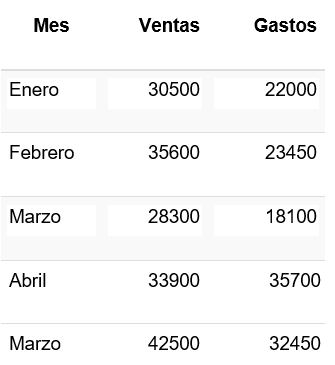

A continuación, generar nuevas columna:
1.	Columna 1 =  Gasto/Ventas*100.
2.	Columna 2 =  Si Ventas>= 30000, imprimir “Meta Superada”, caso contrario imprimir “Meta no Superada”.
3.	Columna 3 =  Si Gasto>Ventas, calcular el sobre gasto.
4.	Obtener el total de las ventas de los últimos 3 meses
5.	Obtener el total de gastos de febrero a abril



In [ ]:
# Creamos funciones para las columnas calculadas
  
def fcolumna1(pgasto, pventa):
  return pgasto/pventa*100

def fcolumna2(pventa):
    if pventa >= 30000:
      rmessage = "Meta Superada"
    else: 
      rmessage = "Meta no Superada"
    return rmessage

def fcolumna3(pgasto, pventa):
    if pgasto > pventa:
      res = pgasto-pventa
    else:
      res = 0
    return res

In [ ]:
df = pd.DataFrame(data=[["Enero",   30500, 22000], 
                        ["Febrero", 35600, 23450], 
                        ["Marzo",   28300, 18100], 
                        ["Abril",   33900, 35700], 
                        ["Marzo",   42500, 32450]],                   
                  columns=["Mes", "Ventas", "Gastos"])

# Copiamos el dataframe para no perder la data original
df_rs = df.copy()

# Preg1: Calculamos la columna1
df_rs["columna 1"] = fcolumna1(df["Gastos"], df["Ventas"])

# Preg2: Calculamos la columna2
df_rs["columna 2"] = df.apply(lambda row: fcolumna2(row["Ventas"]), axis=1)

# Preg3: Calculamos la columna3
df_rs["columna 3"] = df.apply(lambda row: fcolumna3(row["Gastos"], row["Ventas"]), axis=1)

# Añadimos columna auxiliar con el mes en número
df_rs["NroMes"] = ["01", "02", "03", "04", "03"]

df_rs


,Mes,Ventas,Gastos,columna 1,columna 2,columna 3,NroMes
0,Enero,30500,22000,72.131148,Meta Superada,0,01
1,Febrero,35600,23450,65.870787,Meta Superada,0,02
2,Marzo,28300,18100,63.957597,Meta no Superada,0,03
3,Abril,33900,35700,105.309735,Meta Superada,1800,04
4,Marzo,42500,32450,76.352941,Meta Superada,0,03


In [ ]:
# Preg4
# Agrupamos por mes
df_rs_gb = df_rs.groupby(["NroMes", "Mes"])["Ventas"].sum()

# Mostramos el total de los ultimos 3 meses
print(f"Total de los ultimos 3 meses: {df_rs_gb.tail(3).sum()}")

Total de los ultimos 3 meses: 140300


In [ ]:
# Preg5
# Agrupamos por mes
df_rs_gb = df_rs.groupby(["NroMes", "Mes"])["Gastos"].sum()

# Mostramos el total de los ultimos 3 meses
print(f"Total de gastos de Febrero a Abril: {df_rs_gb[1:4].sum()}")

Total de gastos de Febrero a Abril: 109700


# Ejercicio N°4
Con el siguiente fichero Data - Riesgos.csv contiene información de riesgo de clientes de un banco. Escribir un programa con los siguientes requisitos:
1.	Generar un DataFrame con los datos del fichero.
2.	Mostrar por pantalla las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, mostrar las 10 primeras filas y las 10 últimas filas, verificar si tiene datos perdidos/nulos.
3.	Extraer las 100 primeras filas y almacenarlas en un contenedor.


In [65]:
# Preg1
# consultamos al usuario si va cargar un fichero de venta
carga = input("Desea cargar fichero de ventas (S)i o (N)o: ")
# si es "S" o "s" solicita el fichero a cargar, caso contrario se agradece la visita
if carga.lower() == 's' :
    #cargamos la data desde nuestra PC
    from google.colab import files
    files.upload()
    print("fin de la carga de archivo")
else:
    print("gracias por su visita")

Desea cargar fichero de ventas (S)i o (N)o: s


Saving Data - Riesgos.csv to Data - Riesgos (1).csv
fin de la carga de archivo


In [66]:
df = pd.read_csv('Data - Riesgos.csv')

In [67]:
# Preg2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             4500 non-null   int64  
 1   edad           4487 non-null   float64
 2   meses          4494 non-null   float64
 3   max_ant        4496 non-null   float64
 4   ingreso        4495 non-null   float64
 5   score          4495 non-null   float64
 6   tipo_vivienda  4500 non-null   int64  
 7   zona           4494 non-null   float64
 8   nivel          4500 non-null   int64  
 9   riesgo         4500 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 351.7 KB


In [68]:
#df

In [69]:
# Obtenemos los 10 primeros
df_pri10 = df.head(10)
# Obtenemos los 10 ultimos
df_ult10 = df.tail(10)

# Unimos los dos dataframes
df_union = pd.concat([df_pri10, df_ult10], sort= False)
df_union

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.0,6.0,3230.00,192.0,2,3.0,2,1
1,2211,32.0,185.0,7.0,2930.00,217.0,2,1.0,5,1
2,2212,28.0,NaN,7.0,1883.70,202.0,2,1.0,2,1
3,2216,56.0,200.0,0.0,850.00,194.0,2,1.0,5,1
4,2218,32.0,131.0,65.0,3200.00,200.0,2,1.0,2,1
5,2219,34.0,145.0,6.0,7000.00,196.0,2,5.0,2,1
6,2226,NaN,114.0,0.0,2171.50,178.0,2,2.0,1,1
7,2227,27.0,116.0,0.0,800.00,169.0,2,1.0,5,1
8,2228,26.0,182.0,6.0,3150.00,190.0,4,3.0,5,1
9,2230,25.0,154.0,1.0,2600.00,189.0,2,1.0,2,1


In [71]:
# Verificamos si existen datos nulos o perdidos por columna
df_union.isnull().sum() 

ID               0
edad             1
meses            1
max_ant          0
ingreso          0
score            0
tipo_vivienda    0
zona             0
nivel            0
riesgo           0
dtype: int64

In [77]:
# Preg3
# Obtenemos los 100 primeros
df_pri100 = df.head(100)

print("DataFrame Inicial:")

df_pri100

DataFrame Inicial:


,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.0,6.0,3230.00,192.0,2,3.0,2,1
1,2211,32.0,185.0,7.0,2930.00,217.0,2,1.0,5,1
2,2212,28.0,NaN,7.0,1883.70,202.0,2,1.0,2,1
3,2216,56.0,200.0,0.0,850.00,194.0,2,1.0,5,1
4,2218,32.0,131.0,65.0,3200.00,200.0,2,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
95,2387,41.0,141.0,0.0,3420.36,214.0,4,2.0,1,1
96,2389,29.0,159.0,17.0,1157.06,163.0,2,4.0,2,1
97,2391,27.0,122.0,NaN,2000.00,188.0,2,1.0,2,1
98,2392,35.0,111.0,0.0,812.53,177.0,2,1.0,5,1


In [80]:
# copiamos el dataframe con los 100 primeros registros
df_p100 = df_pri100.copy()

# creamos las etiquetas
bin_labels=labels=['21 a 30', '31 a 40', '41 a 50', '51 a 60', '61 a 70']

# creamos una nueva columna utilizando la funcion cut para crear los contenedores por rango de edades

df_p100['Rango-Edad'] = pd.cut(x=df_pri100['edad'], bins=[20,30,40,50,60,70],labels=bin_labels)

In [81]:
# mostrado el dataframe 
print("DataFrame con Rango-Edad:")

df_p100.loc[:, ["edad", "Rango-Edad"]]

DataFrame con Rango-Edad:


,edad,Rango-Edad
0,33.0,31 a 40
1,32.0,31 a 40
2,28.0,21 a 30
3,56.0,51 a 60
4,32.0,31 a 40
...,...,...
95,41.0,41 a 50
96,29.0,21 a 30
97,27.0,21 a 30
98,35.0,31 a 40
